# Data Preprocessing and Feature Engineering
You should build a machine learning pipeline with a data preprocessing and feature engineering step. In particular, you should do the following:
- Load the `adult` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). 
- Conduct data preprocessing and feature engineering by 
    - Identifying the implicit missing values of attributes and replacing them with an explicit missing value using [Pandas](https://pandas.pydata.org/docs/user_guide/missing_data.html#missing-data).
    - removing explicit missing values using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html);
    - encoding categorical attributes using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html);
    - normalizing/scaling features using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html);
    - reducing the dimensionality of the dataset using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html);
    - and handling imbalanced classes using [Imbalanced-Learn](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html).
- Train and test a support vector machine model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).
- Evaluate the impact of the data preprocessing and feature engineering techniques on the effectiveness and efficiency of the model.
- Check the documentation to identify the most important hyperparameters, attributes, and methods. Use them in practice.

In [185]:
import pandas as pd 
import sklearn.model_selection
import sklearn.preprocessing
import sklearn.compose
import sklearn.svm
import sklearn.metrics

# Define a Problem Statement.
Predict the salary of the synthetic persons.

# Data Collection.

In [68]:
df= pd.read_csv('adult.csv')
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [73]:
# Splitting the Data into TestData(30%) and TrainData(70%)
df_train , df_test = sklearn.model_selection.train_test_split(df,test_size=0.30)

print("df size",df.shape)
print("df_train size",df_train.shape)
print("df_test size",df_test.shape)


df size (32561, 15)
df_train size (22792, 15)
df_test size (9769, 15)


# Data Exploration.

In [76]:
df_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
target            object
dtype: object

<Axes: >

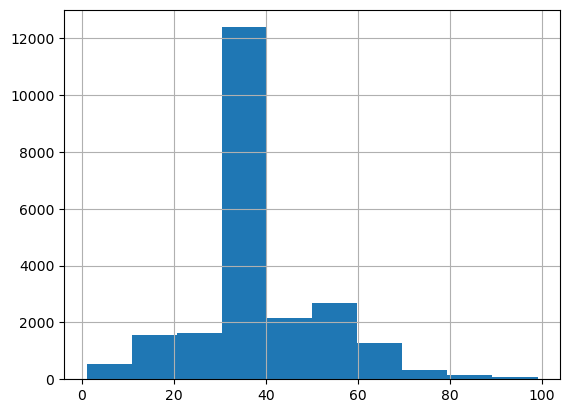

In [113]:
df_train['education'].value_counts()
df_train['marital-status'].value_counts()
df_train['occupation'].value_counts()
df_train['relationship'].value_counts()
df_train['race'].value_counts()
df_train['sex'].value_counts()
df_train['native-country'].value_counts()
df_train['hours-per-week'].hist()

<Axes: >

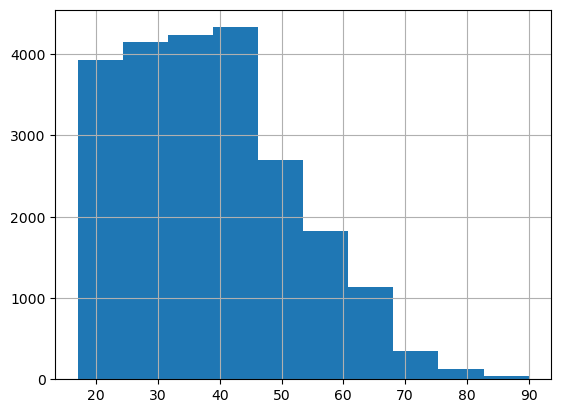

In [77]:
df_train['age'].hist()

In [79]:
df_train['workclass'].value_counts()

workclass
 Private             15872
 Self-emp-not-inc     1769
 Local-gov            1472
 ?                    1278
 State-gov             919
 Self-emp-inc          787
 Federal-gov           680
 Without-pay            11
 Never-worked            4
Name: count, dtype: int64

<Axes: xlabel='workclass'>

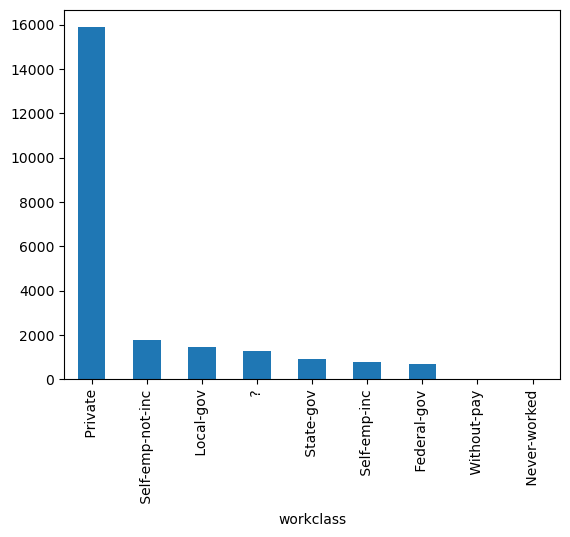

In [81]:
df_train['workclass'].value_counts().plot(kind='bar')

In [83]:
df_train['workclass'].unique()

array([' Self-emp-inc', ' Private', ' State-gov', ' Self-emp-not-inc',
       ' Local-gov', ' ?', ' Federal-gov', ' Without-pay',
       ' Never-worked'], dtype=object)

<Axes: xlabel='target'>

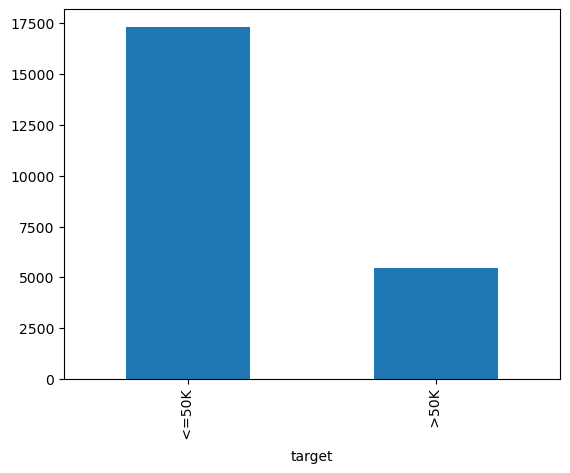

In [86]:
df_train['target'].value_counts().plot(kind='bar')

<Axes: >

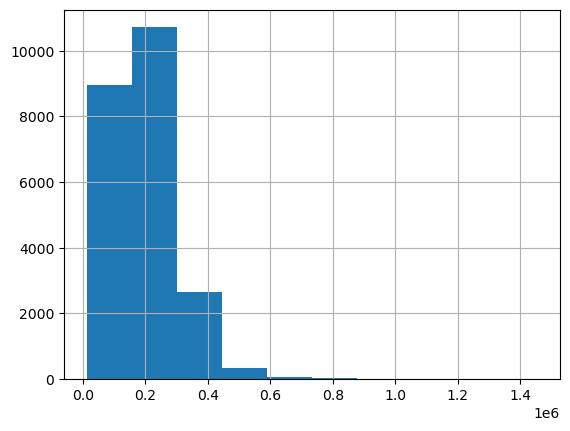

In [94]:
df_train['fnlwgt'].hist()

In [96]:
df_train['education'].value_counts()
df_train['marital-status'].value_counts()

marital-status
 Married-civ-spouse       10514
 Never-married             7535
 Divorced                  3073
 Widowed                    696
 Separated                  678
 Married-spouse-absent      277
 Married-AF-spouse           19
Name: count, dtype: int64

# Data Preprocessing.

In [87]:
# Fixing the Implicit missing values for the columsn workclass

df_train['workclass'].replace(to_replace=' ?',value='Fixed_value').unique()

array([' Self-emp-inc', ' Private', ' State-gov', ' Self-emp-not-inc',
       ' Local-gov', 'Fixed_value', ' Federal-gov', ' Without-pay',
       ' Never-worked'], dtype=object)

<Axes: xlabel='workclass'>

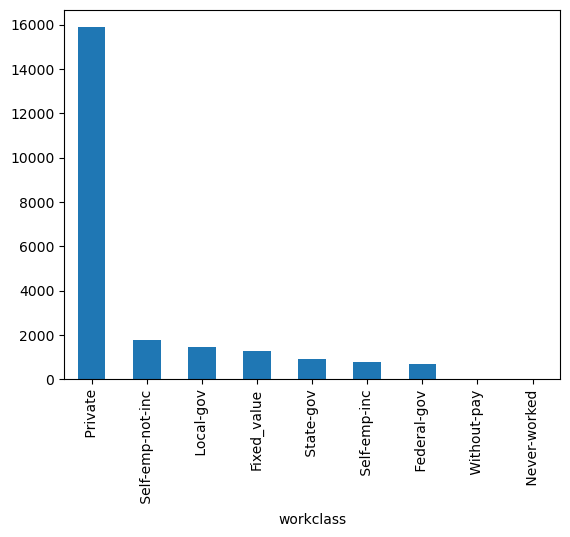

In [93]:
df_train['workclass']=df_train['workclass'].replace(to_replace=' ?',value='Fixed_value')
df_train['workclass'].value_counts().plot(kind='bar')

<Axes: xlabel='occupation'>

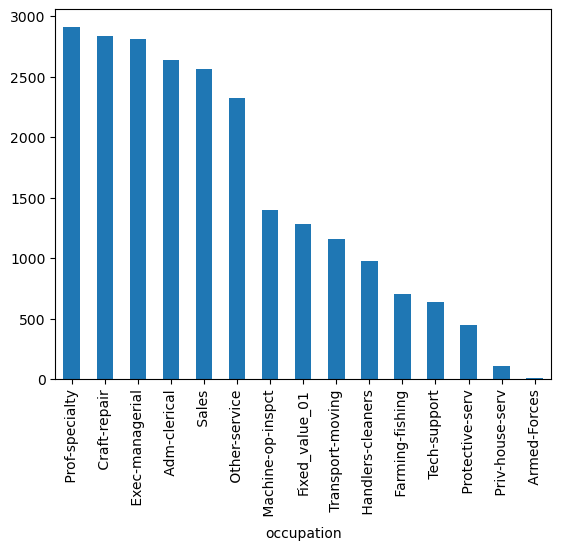

In [100]:
df_train['occupation']=df_train['occupation'].replace(to_replace=' ?',value='Fixed_value_01')
df_train['occupation'].value_counts().plot(kind='bar')

In [107]:
df_train['native-country'].unique()

array([' United-States', ' Mexico', ' Haiti', ' Vietnam', ' Puerto-Rico',
       ' ?', ' El-Salvador', ' China', ' Iran', ' Columbia', ' Jamaica',
       ' Germany', ' Philippines', ' Scotland', ' Portugal', ' Canada',
       ' Taiwan', ' Ireland', ' Yugoslavia', ' Greece', ' Cuba', ' Japan',
       ' South', ' Italy', ' Thailand', ' Cambodia',
       ' Outlying-US(Guam-USVI-etc)', ' India', ' Nicaragua', ' Peru',
       ' Dominican-Republic', ' Holand-Netherlands', ' Poland',
       ' Hungary', ' Guatemala', ' England', ' Hong', ' France',
       ' Trinadad&Tobago', ' Ecuador', ' Laos', ' Honduras'], dtype=object)

In [109]:
df_train['native-country']=df_train['native-country'].replace(to_replace=' ?',value='Fixed_value_02')
df_train['native-country'].value_counts()

native-country
 United-States                 20458
 Mexico                          436
Fixed_value_02                   393
 Philippines                     139
 Germany                          88
 Canada                           82
 Puerto-Rico                      78
 El-Salvador                      77
 India                            75
 England                          64
 Cuba                             62
 Italy                            57
 South                            55
 China                            54
 Jamaica                          54
 Dominican-Republic               49
 Vietnam                          48
 Japan                            43
 Guatemala                        42
 Poland                           42
 Columbia                         41
 Taiwan                           35
 Iran                             31
 Haiti                            31
 Nicaragua                        25
 Peru                             25
 Portugal              

In [182]:
x_train = df_train.drop('target',axis=1)
y_train = df_train['target']
x_test = df_test.drop('target',axis=1)
y_test = df_test['target']


print('xtrain size',x_train.shape)
print('xtest size',x_test.shape)
print('ytrain size',y_train.shape)
print('ytest size',y_test.shape)

xtrain size (22792, 14)
xtest size (9769, 14)
ytrain size (22792,)
ytest size (9769,)


# Feature Engineering

In [183]:
# Getting the list of columns that are categorical and numerical
numerical_attributes=x_train.select_dtypes(include=['int64','float64']).columns
categorical_attributes=x_train.select_dtypes(include=['object']).columns

# column Transformation part
ct = sklearn.compose.ColumnTransformer ([
     ("Startdard_scaling",sklearn.preprocessing.StandardScaler(),numerical_attributes),
     ("One_Hot_Encoding",sklearn.preprocessing.OneHotEncoder(handle_unknown="ignore"),categorical_attributes)
])

ct.fit(x_train)
x_train=ct.transform(x_train)
x_test=ct.transform(x_test)


print('x train size :',x_train.shape)
print('x test size :',x_test.shape)

x train size : (22792, 108)
x test size : (9769, 108)


# Model Training

In [184]:
model = sklearn.svm.SVC()
model.fit(x_train, y_train)

SVC()

# Model Assessment 

In [186]:
y_predicted = model.predict(x_test)
accuracy=sklearn.metrics.accuracy_score(y_test,y_predicted)
accuracy

0.8631384993346299